## Introduction

This project explores the Breast Cancer data set from Kaggle , focusing on cleaning and profiling outliers in various metrics specified in Benign or Malignant Tumors.

**Objectives:**
- Understand the structure of the dataset.
- Clean missing or inconsistent data.
- Perform visual and statistical exploration.
- Derive actionable insights.


In [1]:

import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Breast_cancer_dataset.csv')




### Initial Step: Data Loading

The first step in the exploratory data analysis (EDA) process involves loading the Breast Cancer dataset into a pandas DataFrame. This allows us to inspect the raw data, understand its structure, and prepare for further cleaning and analysis.

In [2]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Examining the data
- Viewing and examining the data types, column names and values. 
- Checking for null values and possible discrepancies in row values using `describe` method.
- Filtering out any null values incorrectly type casted and replacing them with `null` type.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.iloc[0]

id                           842302
diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                    1001.0
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                   2019.0
smoothness_worst             0.1622
compactness_worst           

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.replace(["?","NA","Unknown"],np.nan,inplace=True)
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

*Checking for duplicates row-wise*

In [9]:
df.duplicated().sum()

np.int64(0)

 * Removing unwanted columns and null values.
 * Renaming columns to maintain uniformity

In [10]:
df.dropna(axis=1,how='all',inplace=True)

In [11]:
df.columns[df.isnull().all()]

Index([], dtype='object')

In [12]:
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

#### Returning subset of unique values entered under column to filter out duplicate str

In [13]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

## Profiling and EDA
- Getting the statistical summary of some features
- Comparing frequency of Benign or Malignant Diagnosis
- Visualising distribution of set of features using Histogram
- Visualising them using boxplots to scan for outliers according diagnosis
- Creating a Correlation Heatmap 
- Computing all 3 quantiles, outlier count, outlier ratio, mean, minimum and maximum values


<Axes: xlabel='diagnosis', ylabel='count'>

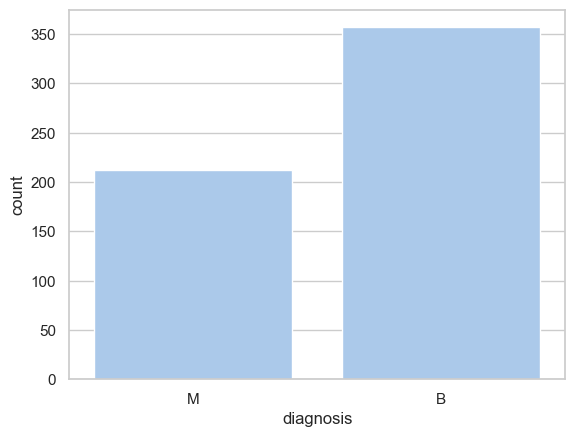

In [14]:
df['diagnosis'].value_counts()
sns.countplot(x='diagnosis', data=df)


In [15]:
df[['radius_mean', 'texture_mean', 'area_mean']].describe()


,radius_mean,texture_mean,area_mean
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,654.889104
std,3.524049,4.301036,351.914129
min,6.981000,9.710000,143.500000
25%,11.700000,16.170000,420.300000
50%,13.370000,18.840000,551.100000
75%,15.780000,21.800000,782.700000
max,28.110000,39.280000,2501.000000


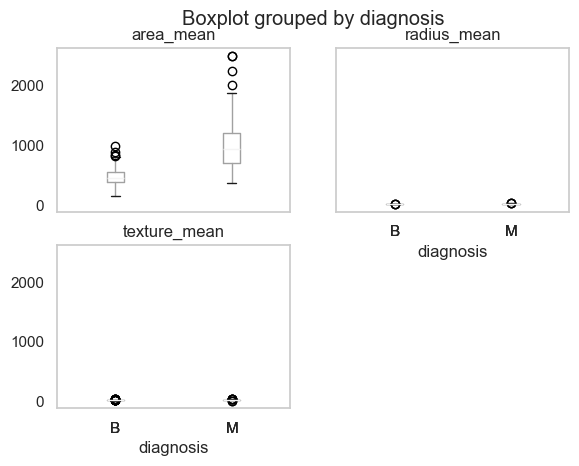

In [16]:
import matplotlib.pyplot as plt

df.boxplot(
    column=['area_mean', 'radius_mean', 'texture_mean'],
    by='diagnosis',
    grid=False
)
plt.show()

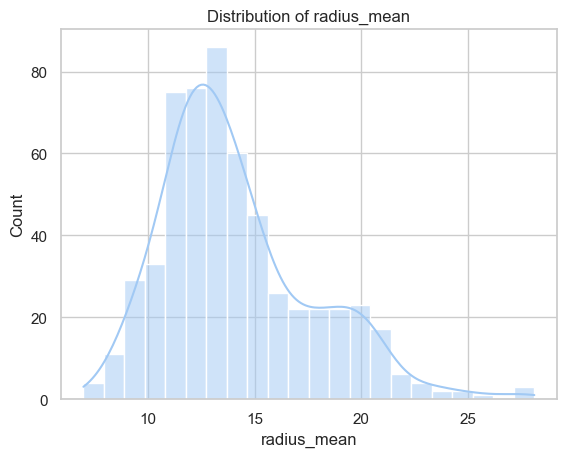

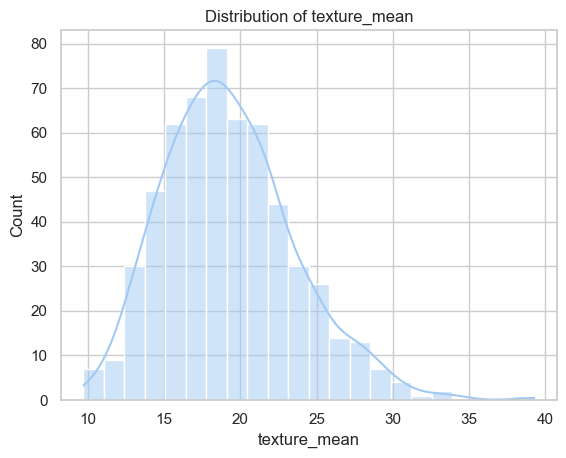

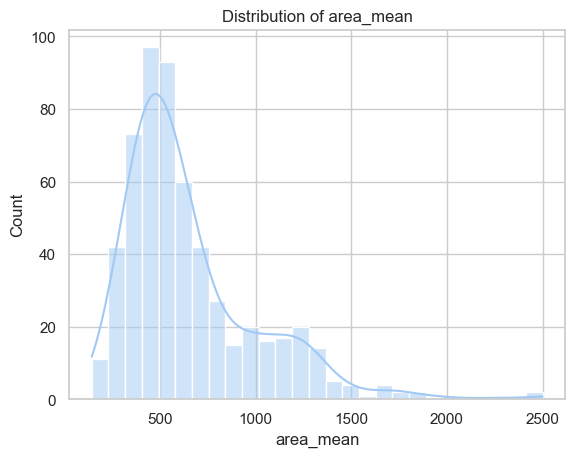

In [17]:
features = ['radius_mean', 'texture_mean', 'area_mean']
for feature in features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

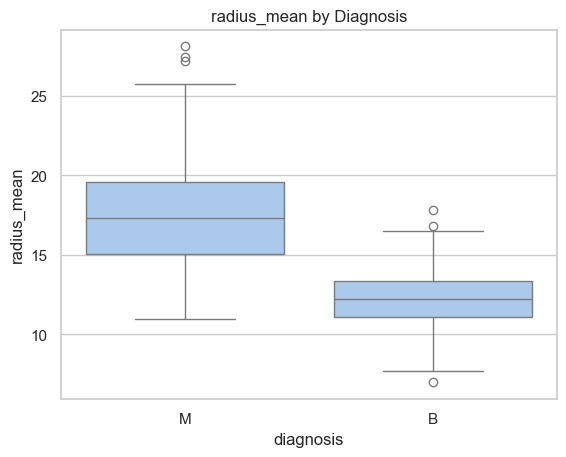

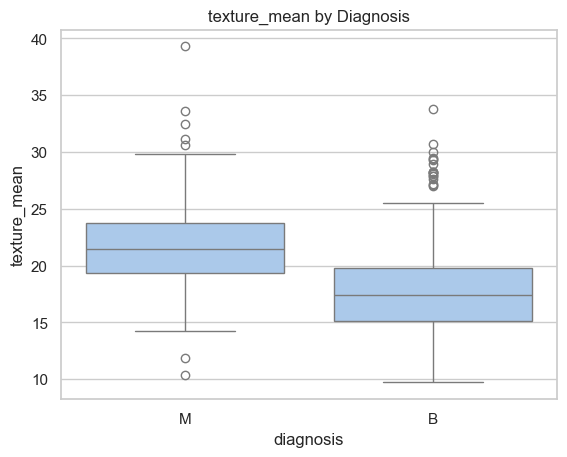

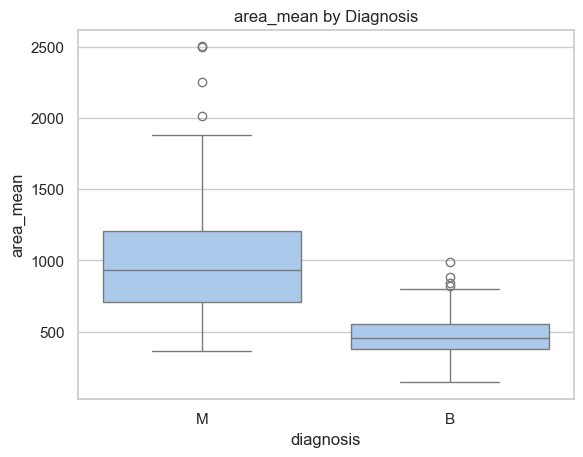

In [18]:
features = ['radius_mean', 'texture_mean', 'area_mean']
for feature in features:
    plt.figure()
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
    plt.show()


In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns.drop("id")
results=[]

for col in sorted(numeric_cols):
    q1 = df[col].quantile(0.25)
    cmedian = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = df[(df[col]<lb) |(df[col]>ub)]
    outlier_count = len(outliers)
    outlier_ratio = (outlier_count / len(df)) * 100
    min_val = df[col].min()
    max_val = df[col].max()
    q25=q1
    q75=q3
    
    results.append([col, min_val, q25, cmedian, q75, max_val, outlier_count, outlier_ratio])    
    

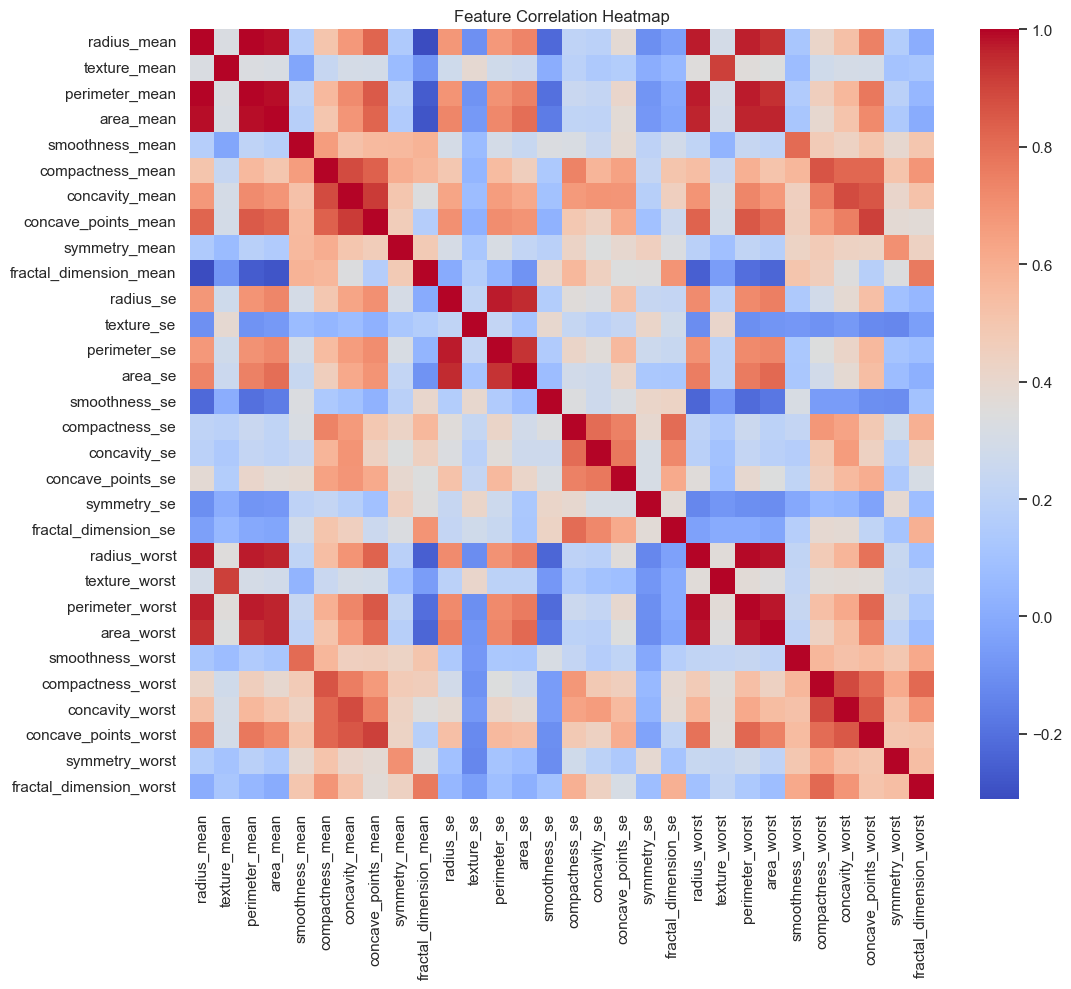

In [20]:
numeric_df = df.drop(columns=['id']).select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

## Key Insights

-  The dataset is moderately **imbalanced**, with more **benign (B)** cases than **malignant (M)** cases. This can affect model training and evaluation.
-  From the **boxplots**, malignant tumors tend to have **higher values** for features like `radius_mean`, `area_mean`, and `perimeter_mean` compared to benign tumors — making these features potentially useful for classification.
-  The **correlation heatmap** shows that `radius_mean`, `area_mean`, and `perimeter_mean` are **very strongly positively correlated** (correlation > 0.95). This suggests feature redundancy — we may want to drop one or apply dimensionality reduction techniques like PCA.
-  `concavity_mean` and `concave_points_mean` are also **highly correlated**, likely measuring similar aspects of tumor shape complexity.
-  The feature distributions (histograms) show **right-skewed shapes** for `radius_mean` and `area_mean`, indicating that a few tumors have extremely large measurements. This might influence modeling and scaling choices.





## Further Polishing
- Encoded the diagnosis column for easier access for further analysis
- Derived a another data frame with outlier summary information
- Visualised the Area Standard Error Feature 

In [21]:
df['diagnosis_en'] = df['diagnosis'].map({'M':1,'B':0})

In [22]:
outlier_summary =pd.DataFrame(
    results,
    columns=["Column","Min","Q1","Median","Q3", "Max", "Outlier Count", "Outlier Ratio (%)"],
    
)
outlier_summary=outlier_summary.sort_values(by="Outlier Ratio (%)",ascending=False)
outlier_summary

,Column,Min,Q1,Median,Q3,Max,Outlier Count,Outlier Ratio (%)
1,area_se,6.802000,17.850000,24.530000,45.190000,542.20000,65,11.423550
19,radius_se,0.111500,0.232400,0.324200,0.478900,2.87300,38,6.678383
16,perimeter_se,0.757000,1.606000,2.287000,3.357000,21.98000,38,6.678383
2,area_worst,185.200000,515.300000,686.500000,1084.000000,4254.00000,35,6.151142
22,smoothness_se,0.001713,0.005169,0.006380,0.008146,0.03113,30,5.272408
4,compactness_se,0.002252,0.013080,0.020450,0.032450,0.13540,28,4.920914
13,fractal_dimension_se,0.000895,0.002248,0.003187,0.004558,0.02984,28,4.920914
25,symmetry_se,0.007882,0.015160,0.018730,0.023480,0.07895,27,4.745167
0,area_mean,143.500000,420.300000,551.100000,782.700000,2501.00000,25,4.393673
14,fractal_dimension_worst,0.055040,0.071460,0.080040,0.092080,0.20750,24,4.217926


In [23]:
outlier_summary.shape

(30, 8)

In [24]:
df.to_csv('breast_cancer_clean.csv',index=False)

In [25]:
outlier_summary.to_csv('outlier_summary.csv', index=False)



## Conclusion

In this analysis of the Breast Cancer dataset, we performed data cleaning and exploratory data analysis (EDA) to understand key patterns in the data. We identified that several features, such as `radius_mean`, `area_mean`, and `perimeter_mean` — are strongly associated with tumor diagnosis, showing clear separation between benign and malignant classes. The presence of highly correlated features suggests redundancy, which may be addressed during feature selection or dimensionality reduction. These findings lay the groundwork for future modeling steps, such as building a classification model to predict tumor type.